In [1]:
import sqlite3


connection = sqlite3.connect('student_grades.db')

In [2]:
# Create a cursor object
cursor = connection.cursor()

In [3]:
# Creating the students  table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

#Creating grades table

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

In [4]:
#Inserting data into students table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis'),
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

# Commit the transaction
connection.commit()

In [5]:
#Inserting data into grades table
grades_data = [
    
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 75),
    (3, 'English', 91),
    (3, 'History', 87),
    (4, 'Math', 72),
    (4, 'English', 89),
    (4, 'History', 99),
    (5, 'Math', 100),
    (5, 'English', 65),
    (5, 'History', 83),
    
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

In [6]:
#Printing the results from both the tables we just created to make sure they were created properly

# Fetch all data from the students table
cursor.execute("SELECT * FROM students")
rows = cursor.fetchall()

# Print the results
print("All students data:")
for row in rows:
    print(row)

# Fetch all data from the sales table
cursor.execute("SELECT * FROM grades")
rows = cursor.fetchall()

# Print the results
print("All grades data:")
for row in rows:
    print(row)

All students data:
(1, 'Alice', 'Johnson')
(2, 'Bob', 'Smith')
(3, 'Carol', 'White')
(4, 'David', 'Brown')
(5, 'Eve', 'Davis')
(6, 'Alice', 'Johnson')
(7, 'Bob', 'Smith')
(8, 'Carol', 'White')
(9, 'David', 'Brown')
(10, 'Eve', 'Davis')
(11, 'Alice', 'Johnson')
(12, 'Bob', 'Smith')
(13, 'Carol', 'White')
(14, 'David', 'Brown')
(15, 'Eve', 'Davis')
All grades data:
(1, 1, 'Math', 95)
(2, 1, 'English', 88)
(3, 1, 'History', 90)
(4, 2, 'Math', 82)
(5, 2, 'English', 76)
(6, 2, 'History', 85)
(7, 3, 'Math', 75)
(8, 3, 'English', 91)
(9, 3, 'History', 87)
(10, 4, 'Math', 72)
(11, 4, 'English', 89)
(12, 4, 'History', 99)
(13, 5, 'Math', 100)
(14, 5, 'English', 65)
(15, 5, 'History', 83)
(16, 1, 'Math', 95)
(17, 1, 'English', 88)
(18, 1, 'History', 90)
(19, 2, 'Math', 82)
(20, 2, 'English', 76)
(21, 2, 'History', 85)
(22, 3, 'Math', 75)
(23, 3, 'English', 91)
(24, 3, 'History', 87)
(25, 4, 'Math', 72)
(26, 4, 'English', 89)
(27, 4, 'History', 99)
(28, 5, 'Math', 100)
(29, 5, 'English', 65)
(30,

In [7]:
#Finding all the students grades
cursor.execute('''SELECT students.first_name, 
students.last_name, grades.subject, grades.grade 
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
student_grades = cursor.fetchall()


print("All students grades:")
for row in student_grades:
    print(row)


All students grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 75)
('Carol', 'White', 'English', 91)
('Carol', 'White', 'History', 87)
('David', 'Brown', 'Math', 72)
('David', 'Brown', 'English', 89)
('David', 'Brown', 'History', 99)
('Eve', 'Davis', 'Math', 100)
('Eve', 'Davis', 'English', 65)
('Eve', 'Davis', 'History', 83)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 75)
('Carol', 'White', 'English', 91)
('Carol', 'White', 'History', 87)
('David', 'Brown', 'Math', 72)
('David', 'Brown', 'English', 89)
('David', 'Brown', 'History', 99)
('Eve', 'Davis', 'Math', 100)
('Eve', 'Davis', 'English', 65)
('Eve', 'Davis', 'History', 83)

In [8]:
#Finding the average grade of all students
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

# Fetch all results
average = cursor.fetchall()

print("Students' Average Grades:")
for row in average:
    print(row)

Students' Average Grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 84.33333333333333)
('David', 'Brown', 86.66666666666667)
('Eve', 'Davis', 82.66666666666667)


In [9]:
#Finding the student with the highest overall grade

cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
''')

# Fetch the result
Best_performer = cursor.fetchone()

print("The person with the highest average grade is", Best_performer[0], Best_performer[1])

The person with the highest average grade is Alice Johnson


In [10]:
#Finding the average grade in math
cursor.execute('''
SELECT AVG(grades.grade) as average_math_grade
FROM grades
WHERE grades.subject = 'Math'
''')

# Fetch the result
average_math = cursor.fetchone()

print("The average grade in math is", average_math[0])

The average grade in math is 84.8


In [11]:
#Finding the students who scored above a 90 in any subject
cursor.execute('''
SELECT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

# Fetch all results
above_90 = cursor.fetchall()

# Print the results
print("The students who scored above a 90 in any subject are:")
for row in above_90:
    print(row[0], row[1])


The students who scored above a 90 in any subject are:
Alice Johnson
Carol White
David Brown
Eve Davis
Alice Johnson
Carol White
David Brown
Eve Davis


In [12]:
# Load students data into a Pandas DataFrame
import pandas as pd


students_df = pd.read_sql_query('SELECT * FROM students', connection)



students_df

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis
5,6,Alice,Johnson
6,7,Bob,Smith
7,8,Carol,White
8,9,David,Brown
9,10,Eve,Davis


In [13]:
# Load grades data into a Pandas DataFrame

grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

grades_df

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76
5,6,2,History,85
6,7,3,Math,75
7,8,3,English,91
8,9,3,History,87
9,10,4,Math,72


In [14]:
#Combining the two data tables into a single one in pandas
cursor.execute('''
SELECT students.student_id, students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')


joined_data = cursor.fetchall()

combined_df = pd.DataFrame(joined_data, columns = ["student_id", "first_name", "last_name", "subject", "grade"])

combined_df

,student_id,first_name,last_name,subject,grade
0,1,Alice,Johnson,Math,95
1,1,Alice,Johnson,English,88
2,1,Alice,Johnson,History,90
3,2,Bob,Smith,Math,82
4,2,Bob,Smith,English,76
5,2,Bob,Smith,History,85
6,3,Carol,White,Math,75
7,3,Carol,White,English,91
8,3,Carol,White,History,87
9,4,David,Brown,Math,72


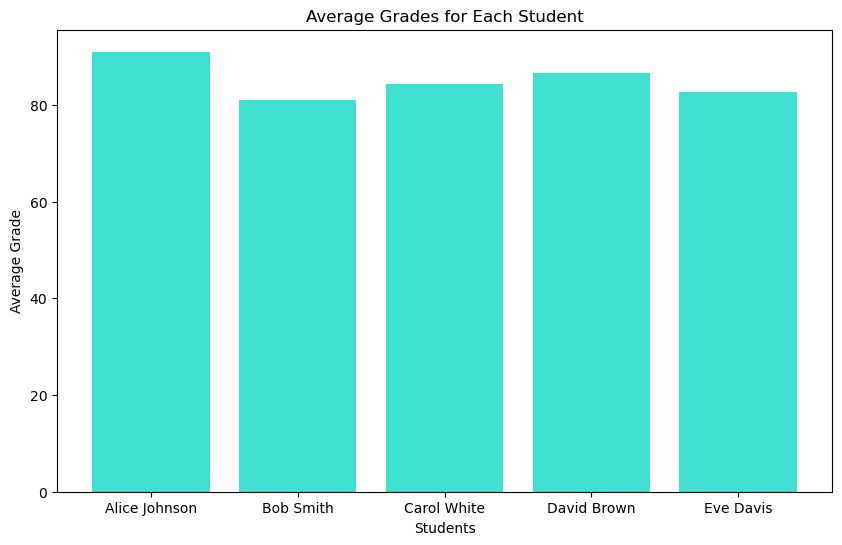

In [15]:
#Bar chart with average grade for each student
import matplotlib.pyplot as plt

average_df = pd.DataFrame(average, columns = ["first_name", "last_name", "average_grade"])


#Combine first name and last name to create full names
average_df['full_name'] = average_df['first_name'] + ' ' + average_df['last_name']

# Plot the average grades for each student
plt.figure(figsize=(10, 6))
plt.bar(average_df['full_name'], average_df['average_grade'], color='turquoise')
plt.xlabel('Students')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

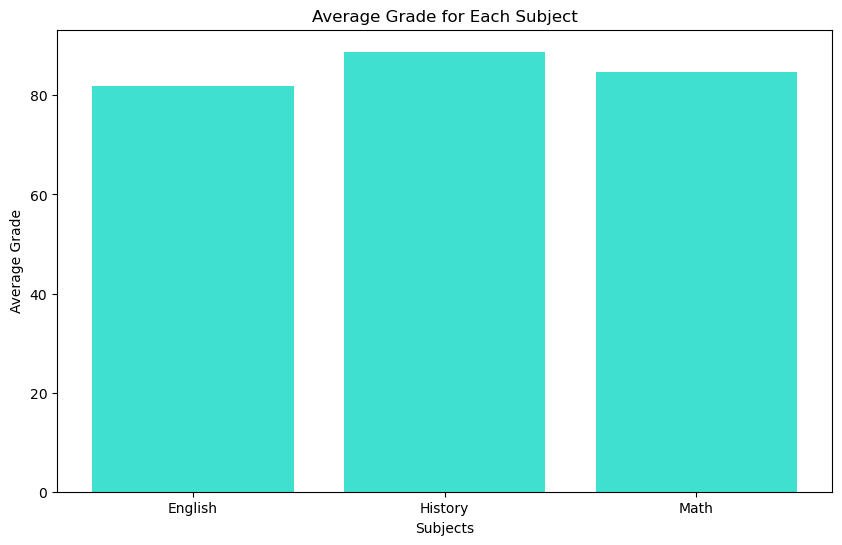

In [16]:
#Bar chart with the average grades for each subject
avg_gps = combined_df.groupby('subject')['grade'].mean().reset_index()
avg_gps.columns = ['subject', 'Average Grade']

plt.figure(figsize=(10, 6))
plt.bar(avg_gps['subject'], avg_gps['Average Grade'], color = "turquoise")
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.show()

In [17]:
#Finding students with highest grades in each subject

cursor.execute('''SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
    SELECT grades.subject, MAX(grades.grade)
    FROM grades
    GROUP BY grades.subject
);''')

high_per_sub = cursor.fetchall()

hps_df = pd.DataFrame(high_per_sub, columns = ["first_name", "last_name", "subject", "highest_grade"])

hps_df


,first_name,last_name,subject,highest_grade
0,Carol,White,English,91
1,David,Brown,History,99
2,Eve,Davis,Math,100
3,Carol,White,English,91
4,David,Brown,History,99
5,Eve,Davis,Math,100


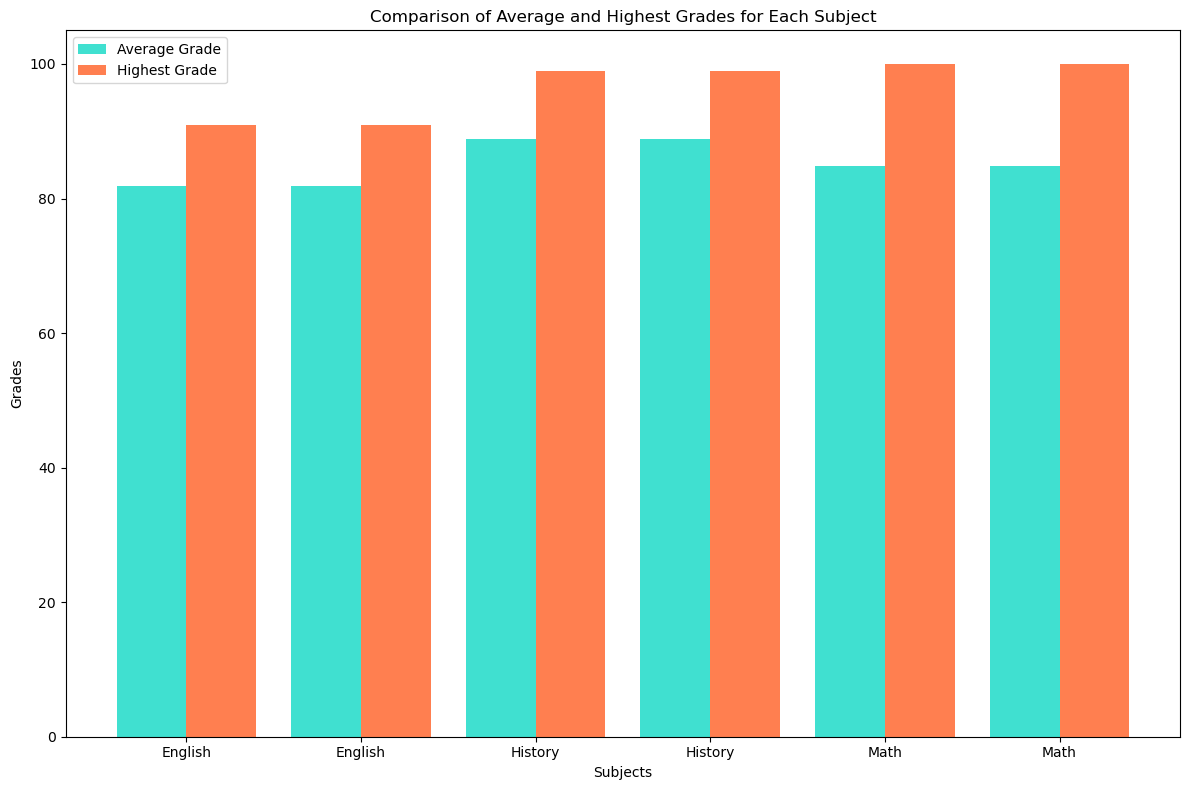

In [18]:
import numpy as np

# Merge the DataFrames on the 'subject' column
combined_df = pd.merge(avg_gps, hps_df[['subject', 'highest_grade']], on='subject', how='left')

# Plotting
plt.figure(figsize=(12, 8))

# Define the positions of the bars
bar_width = 0.4  # Width of bars
index = np.arange(len(combined_df['subject']))  # Positions of subjects

# Plot average grades
plt.bar(index - bar_width/2, combined_df['Average Grade'], bar_width, label='Average Grade', color='turquoise')

# Plot highest grades
plt.bar(index + bar_width/2, combined_df['highest_grade'], bar_width, label='Highest Grade', color='coral')

# Set labels and title
plt.xlabel('Subjects')
plt.ylabel('Grades')
plt.title('Comparison of Average and Highest Grades for Each Subject')
plt.xticks(index, combined_df['subject'])
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
cursor.close()